Popuate random data and export as CSV

In [360]:
import csv
import random
import datetime
from datetime import timedelta
from faker import Faker
MAX_LIGHTS = 5

fake = Faker()


# Light 1 => Living room
# Light 2 => Kitchen
# Light 3 => Toilet
# Light 4 => Room

'''
-- Assuming that it's a 1 room HDB --
Story Board:
1. Reach home
2. Go Kitchen to wash legs/hands
3. Go room to take clothes
4. Kitchen to bath
5. Cook dinner
6. Eat
7. Wash plate
8. Lazy in living room until 10pm
9. Read a book from 10 to 11 in the room
10. 11 sleep until 6am

1 (Living room):
6am - 8am => ON (Preparation to leave house) -
8am - 5pm => OFF (Work)
5pm - 10pm => ON (Laze)
10pm - 6am => OFF (In room to read & sleep)

2 (Kitchen):
6.30am - 7am => ON (Breakfast)
7am - 5pm => OFF (Not at home)
5pm - 7pm => ON (Bath & Cook Dinner)
7pm - 7.30pm => OFF (Eating dinner in the living room)
7.30pm - 8pm => ON (Wash plate)
8pm - 6.30am => OFF (Done and laze in living room)

3 (Toilet):
6am - 7.30am => ON (Preparation for work)
7.30am - 5pm => OFF
5pm - 7pm => ON (Wash leg & Bath)
7pm - 3am => OFF (Not using anymore)
3am - 3.30am => ON (Toilet break)
3.30am - 6am => OFF (Back to sleep)

4 (Room):
6am - 7am => ON (Wake up, preparation)
7am => 5pm OFF (Not at Home already)
5pm => 5.30pm ON (Take clothes)
5.30pm => 10pm => OFF (In living room)
10pm - 11pm => ON (Reading session)
11pm - 6am => OFF (Sleeping)
'''

# 7am - 5pm => ALL OFF
# 5pm - 6pm => [1, 2, 4, 3] ON (Bath, etc)
# 6pm - 9pm => [3,4] OFF (Off room and toilet, each dinner & laze in living room)
# 7pm - 7.30pm => [2] OFF (OFF Kitchen, Finished cooking)
# 9pm - 9.30pm => [2] ON (Wash plate)
# 9.30pm - 7a
# 10pm - 11pm => [1,2,3] OFF (Go room for reading session)

#usual_pattern = [
#    (datetime.time(7, 0), datetime.time(17, 0), False, [1,2]),  # 7am - 5pm: Light Off
#    (datetime.time(17, 0), datetime.time(22, 0), True, [1,2]),  # 5pm - 10pm: Light On (sometimes Off)
#    (datetime.time(20, 0), datetime.time(22, 0), False, [2]),  # 8pm - 10pm: Light On (sometimes Off)
#    (datetime.time(19,0), datetime.time(22,0), True, [1,2]), # 7 - 10 Light On
#    (datetime.time(22, 0), datetime.time(2, 0), False, [1,2]),  # 10pm - 2am: Light Off (sometimes On)
#    (datetime.time(2, 0), datetime.time(2, 15), True, [1,2]),  # 2am - 2:15am: Light On (mostly Off)
#    (datetime.time(2, 15), datetime.time(7, 0), False, [1,2])   # 2:15am - 7am: Light Off (mostly On)
#]

def dt (hh,mm):
    return datetime.time(hh,mm)

usual_pattern = {
    1: [
        # Living room (1)
        (dt(6,1), dt(8,0), True),
        (dt(8,1), dt(17,0), False),
        (dt(17,1), dt(22,0), True),
        (dt(22,1), dt(6,0), False),
    ],
    2: [
        #Kitchen
        (dt(6,30), dt(7,0), True),
        (dt(7,1), dt(17,0), False),
        (dt(17,1), dt(19,0), True),
        (dt(19,1), dt(19,30), False),
        (dt(19,31), dt(20,0), True),
        (dt(20,1), dt(6,30), False),
    ],
    3: [
        #Toilet
        (dt(6,1), dt(7,30), True),
        (dt(7,31), dt(17,0), False),
        (dt(17,1), dt(19,0), True),
        (dt(19,1), dt(3,0), False),
        (dt(3,1), dt(3,30), True),
        (dt(3,31), dt(6,0), False),
    ],
    4: [
        #Room
        (dt(6,1), dt(7,0), True),
        (dt(7,1), dt(17,0), False),
        (dt(17,1), dt(17,30), True),
        (dt(17,31), dt(22,0), False),
        (dt(22,1), dt(23,0), True) ,
        (dt(23,1), dt(6,0), False)
    ]
}

with open("home_assistant_log.csv", "w", newline='') as file:
    writer = csv.writer(file)
    header = ["lightId", "lightOn", "timestamp"]
    writer.writerow(header)

    for i in range(0,1000):
        for eachLight in usual_pattern:
            random_datetime = fake.date_time_between(start_date='-30d', end_date='now')
            light_info = usual_pattern[eachLight]
            for start_time, end_time, light_status in light_info:
                if start_time < random_datetime.time() < end_time:
                    #writer.writerow([str(light_status).lower(), random_datetime, lightId])
                    row = [
                        eachLight, str(light_status).lower(), random_datetime
                    ]
                    writer.writerow(row)
                    #print("Random date time : {}".format(random_datetime.time()))
                    #print("LightId:{}, rand: {}".format(eachLight, random_datetime.time()))
    print("CSV successfully generated")


#with open("home_assistant_log.csv", "w", newline='') as file:
#    writer = csv.writer(file)
#    #header = ["lightOn","timestamp"]
#    #header = ["lightId","lightOn","timestamp"]
#    header = ["lightOn","timestamp", "lightId"]
#    writer.writerow(header)

#    for i in range(0, 1000):
#        random_datetime = fake.date_time_between(start_date='-30d', end_date='now')
#        rangeOfLightId = random.randint(1,MAX_LIGHTS)

#        #for start_time, end_time, light_status in usual_pattern:
#        for index, (start_time, end_time, light_status, lightId) in enumerate(usual_pattern):

#            if start_time < random_datetime.time() < end_time:

#                writer.writerow([str(light_status).lower(), random_datetime, lightId])
#                break


CSV successfully generated


Machine Learning

In [361]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import calendar

# Read the CSV file
df = pd.read_csv("home_assistant_log.csv")

# Define features (X) and target (y)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df['hour_of_day'] = df['timestamp'].dt.hour
df["minute"] = df["timestamp"].dt.minute

#X = df.drop(columns=["timestamp", "lightOn"], axis=1).to_numpy()
#y = df["lightId","lightOn"].to_numpy()

#X = df.drop(columns=["timestamp","lightOn"], axis=1).to_numpy()
X = df[['lightId','hour_of_day','minute']].values
y = df[["lightOn"]].values

#print(X)
#print(y)

### Initialize and train the model
model = DecisionTreeClassifier()
accuracy_scores = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))

ranDt = [fake.date_time() for _ in range(10)]
list_of_days = list(calendar.day_abbr)

for i in ranDt:
    light_status = {}
    rand_date = pd.to_datetime(i)
    hour = rand_date.hour
    day = rand_date.day_of_week
    #month = rand_date.month
    minute = rand_date.minute
    #prediction = model.predict([[hour,day,minute]])
    for lightId in range(1,4+1):
        prediction = model.predict([[lightId,hour,minute]])
        #print("At {:02d}:{:02d}, light {}  predicted to {} -- Actual: {}".format( hour, minute, lightId,"on" if prediction else "off", checkActualOutputOfLight(rand_date) ))
        print("[{:02d}:{:02d}] Light {}, Predicted: {}".format(hour, minute, lightId, prediction))


    #print("At {},{}:{}, light should be {}".format(list_of_days[day-1], hour, minute, "on" if prediction else "off"))
    print("At {:02d}:{:02d}, light predicted to {} -- Actual: {}".format( hour, minute, "on" if prediction else "off", checkActualOutputOfLight(rand_date) ))

Accuracy is 1.0
At 23:45, light predicted to on -- Actual: None
At 00:34, light predicted to off -- Actual: None
At 11:04, light predicted to off -- Actual: OFF
At 20:41, light predicted to on -- Actual: ON
At 21:02, light predicted to on -- Actual: ON
At 06:43, light predicted to off -- Actual: OFF
At 14:21, light predicted to off -- Actual: OFF
At 18:11, light predicted to on -- Actual: ON
At 04:25, light predicted to off -- Actual: OFF
At 15:57, light predicted to off -- Actual: OFF
Accuracy is 0.9961240310077519
[17:35] Light 1, Predicted: [ True]
[17:35] Light 2, Predicted: [ True]
[17:35] Light 3, Predicted: [ True]
[17:35] Light 4, Predicted: [False]
---
[18:03] Light 1, Predicted: [ True]
[18:03] Light 2, Predicted: [ True]
[18:03] Light 3, Predicted: [ True]
[18:03] Light 4, Predicted: [False]
---
[14:50] Light 1, Predicted: [False]
[14:50] Light 2, Predicted: [False]
[14:50] Light 3, Predicted: [False]
[14:50] Light 4, Predicted: [False]
---
[12:00] Light 1, Predicted: [False

Text(0, 0.5, 'Accuracy')

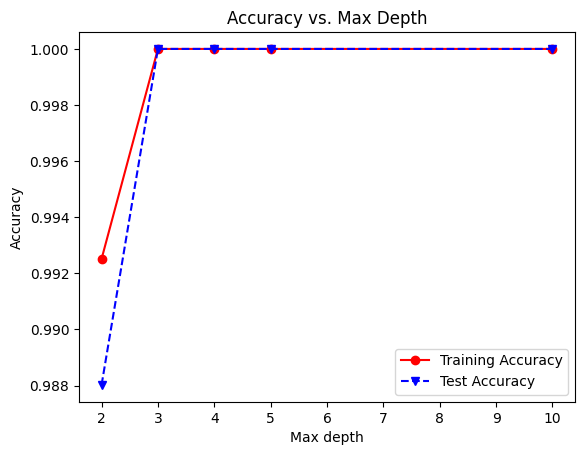

In [364]:
from sklearn import tree
import numpy as np

maxdepths = [2,3,4,5,10]  # 17 different depths

trainAccuracy = np.zeros(len(maxdepths))
testAccuracy = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf2 = tree.DecisionTreeClassifier(max_depth=depth)
    clf2 = clf2.fit(X_train, y_train)
    Y_predTrain = clf2.predict(X_train)
    Y_predTest = clf2.predict(X_test)
    trainAccuracy[index] = accuracy_score(y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
###########################################################################
# Plot training and test accuracies
##########################################################################
    
plt.plot(maxdepths,trainAccuracy,'ro-',maxdepths,testAccuracy,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max depth')
plt.ylabel('Accuracy')    print('---')
